# Golden Section Search

Algorithme de recherche de minimum à une dimension, par encadrement et réduction de l'intervalle de recherche. Cette méthode est en quelque sorte similaire à la méthode de dichotomie pour la recherche d'un zéro.

L'hypothèse principale est que la fonction ne présente qu'un unique minimium dans l'intervalle de recherche.

La fonction $f$ est évaluée en deux points millieu $m_1$ et $m_2$, découpant ainsi la zone de recherche en trois intervalles. Le minimum étant par hypothèse unique, il doit se trouver dans un des deux intervalles autour du point le plus bas évalué, c'est-à-dire soit autour de $m_1$, soit autour de $m_2$.

Deux cas peuvent donc se produire: $f(m_1) > f(m_2)$ ou bien l'inverse. Dans chacun des cas, un nouvel intervalle $[a, b]$ est défini, et la fonction de recherche recommence.

L'astuce de la méthode consiste à réutiliser un des anciens points millieu pour l'itération suivante, économisant ainsi une évaluation.

![schema reduction de l intervalle](optimisation/images/golden.png)

Cette condition fixe la position optimal des points $m_1$ et $m_2$. On note le ratio $\rho$ de la façon suivante :
$$
\rho = \frac{m_1-a}{b-a} = \frac{b-m_2}{b-a}
$$

et on veut :
$$
\rho = \frac{m_2-m_1}{b-m_1} = \frac{1- 2\rho}{1 - \rho}
$$
On obtient l'équation: $1 - 3\rho + \rho^2 = 0$, avec la condition $\rho < 1$:

$$
\rho = \frac{3 - \sqrt{5} }{2}
$$

Si on considère plutôt le ratio $(1-\rho)/\rho$, on trouve après quelques transformations le fameux nombre d'Or $\varphi$:
$$
\frac{b - m_1}{m_1 - a} = \frac{1 - \rho}{\rho} = \frac{2}{3 - \sqrt{5} } - 1 \\
= \frac{3 + \sqrt{5} }{2} - 1
= \frac{1 + \sqrt{5} }{2} = \varphi \sim 1,61803
$$

## Références:
* http://www.math.ucla.edu/~wotaoyin/math273a/slides/Lec3a_1d_search_273a_2015_f.pdf
* https://www.rose-hulman.edu/~bryan/lottamath/onedopt.pdf
* https://fr.wikipedia.org/wiki/M%C3%A9thode_du_nombre_d%27or

## Code

In [36]:
# <!-- collapse=True -->
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
# En réutilisant un des points milieu:

def goldenSearch( f, a, b ):
    epsilon = .001*(b-a)
    rho = (3 - np.sqrt(5))/2
    
    m1 = rho*(b-a) + a
    m2 = b - rho*(b-a)
    f1, f2 = f( m1 ), f( m2 )  
    
    while b-a > epsilon:
        
        if f1 < f2:
            a, b = a, m2
            m2, f2 = m1, f1
            m1 = rho*(b-a) + a
            f1 = f( m1 )
        else:
            a, b = m1, b
            m1, f1 = m2, f2
            m2 = b - rho*(b-a)
            f2 = f( m2 )
            
        #print a, b

    xZero = (a+b)/2.0 
    return xZero

### Tests

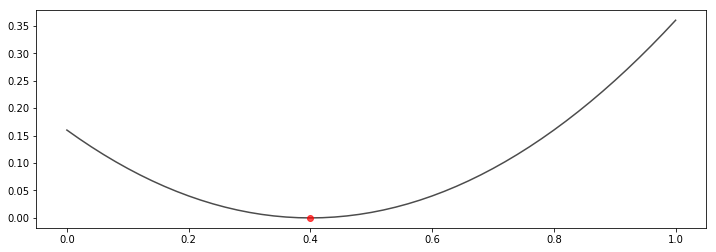

In [37]:
# <!-- collapse=True -->
f = lambda x: (x-.4)**2 
xMin = goldenSearch( f, 0, 1 )   

X = np.linspace( 0, 1, 51 )
Y = f( X )

plt.figure(figsize=(12, 4)  )
plt.plot( X, Y,  'k-', alpha=0.7 )
plt.plot( xMin, f( xMin ),  'ro', alpha=0.7 ); 

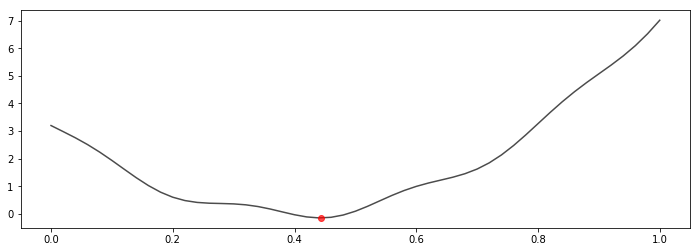

In [38]:
# <!-- collapse=True -->
f = lambda X: .2*np.sin(24*X) + 5*(2*X-0.8)**2
xMin = goldenSearch( f, 0, 1 )   

X = np.linspace( 0, 1, 51 )
Y = f( X )

plt.figure(figsize=(12, 4)  )
plt.plot( X, Y,  'k-', alpha=0.7 )
plt.plot( xMin, f( xMin ),  'ro', alpha=0.7 );

Un cas qui ne marche pas:

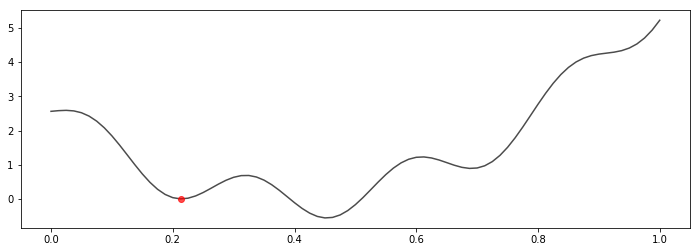

In [44]:
# <!-- collapse=True -->
f = lambda X: .6*np.sin(24*X) + 4*(2*X-0.8)**2
xMin = goldenSearch( f, 0, 1 )   

X = np.linspace( 0, 1, 81 )
Y = f( X )

plt.figure(figsize=(12, 4)  )
plt.plot( X, Y,  'k-', alpha=0.7 )
plt.plot( xMin, f( xMin ),  'ro', alpha=0.7 );

In [1]:
# Code en ne réutilisant pas un des points milieu:

def goldenSearchSimple( f, a, b ):
    epsilon = .001
    rho = 0.3
    
    while b-a > epsilon:
        m1 = rho*(b-a) + a
        m2 = b - rho*(b-a)
        f1, f2 = f( m1 ), f( m2 )  
    
        if f1 < f2:
            a, b = a, m2
        else:
            a, b = m1, b
            
        #print a, b

    xZero = (a+b)/2.0 
    return xZero